In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
from torch.utils.data import default_collate
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from torchmetrics import SpearmanCorrCoef

In [2]:
def get_image_data(method: str, net_out: str, task: str, scanner: int):
    directory = f'../../results-tmp/results/eval/{net_out}/image/'
    image_data = []
    for file in os.listdir(directory):
        #print(file, method, net_out, task, scanner)
        #print(f'-{scanner}-')
        if f'-{method}-' in file and f'-{task}-' in file and f'-{scanner}-' in file:
            f = torch.load(directory + file)
            #print(file, '!')
            if 'corr' in f.keys():
                f['corr'].target = [t.cpu() for t in f['corr'].target]
                f['corr'].preds = [t.cpu() for t in f['corr'].preds]
                f['corr'] = f['corr'].compute()
            image_data.append(f)
        #if 'testing' in file:    
        #    print(file)
    #print(image_data)
    return default_collate(image_data)

def get_image_data_tmp(method: str, net_out: str, task: str, scanner: int):
    directory = f'../../results-tmp/results/eval/{net_out}/image/'
    image_data = []
    for file in os.listdir(directory):
        #print(file, method, net_out, task, scanner)
        #print(f'-{scanner}-')
        if f'-{method}-' in file and f'-{task}-' in file and f'-{scanner}-' in file and 'venus_single' in file:
            f = torch.load(directory + file)
            print(file, '!')
            if 'corr' in f.keys():
                f['corr'].target = [t.cpu() for t in f['corr'].target]
                f['corr'].preds = [t.cpu() for t in f['corr'].preds]
                f['corr'] = f['corr'].compute()
            image_data.append(f)
        #if 'testing' in file:    
        #    print(file)
    #print(image_data)
    return default_collate(image_data)

In [68]:
file='mms-testing-both-B-9-venus_auroc'

method='testing'
task='both'
scanner='B'
net_out='mms'
#
if f'-{method}-' in file and f'-{task}-' in file and f'-{scanner}-' in file:
    print(file)
    
directory = f'../../results-tmp/results/eval/{net_out}/image/'
image_data = []
f = torch.load(directory + file)
if 'corr' in f.keys():
    f['corr'].target = [t.cpu() for t in f['corr'].target]
    f['corr'].preds = [t.cpu() for t in f['corr'].preds]
    f['corr'] = f['corr'].compute()
image_data.append(f)

mms-testing-both-B-9-venus_auroc


In [54]:
image_data

[{'ood': tensor(0.5745), 'corr': tensor(0.7054)}]

In [5]:
df_corr_calgary = pd.DataFrame(columns=['method', 'Domain', 'run', r'Spearmans $\rho$'])
#for method in ['gonzales', 'latents', 'vae']:
for method in ['gonzales', 'latents', 'entropy', 'ensemble_tmp', 'ae']:
#for method in ['entropy', 'ensemble','ensemble_tmp', 'ae']:
    for scanner in [6, 1, 2, 3, 4, 5]:
        try:
            tmp = get_image_data(method=method, 
                                 net_out='calgary', 
                                 task='both', 
                                 scanner=str(scanner))
        except:
            tmp = get_image_data(method=method, 
                     net_out='calgary', 
                     task='corr', 
                     scanner=str(scanner))
        
        if scanner == 1:
            domain = 'GE 1.5'
        if scanner == 2:
            domain = 'GE 3.0'
        if scanner == 3:
            domain = 'Philips 1.5'
        if scanner == 4:
            domain = 'Philips 3.0'
        if scanner == 5:
            domain = 'Siemens 1.5'
        if scanner == 6:
            domain = 'Siemens 3.0 \n(val)'
        
        for i, corr in enumerate(tmp['corr']):

            row = {'Domain': domain, 
                   'method': method, 
                   'run': i, 
                   r'Spearmans $\rho$': corr.numpy().item()}

            df_corr_calgary = df_corr_calgary.append(row, ignore_index=True)

In [3]:
df_corr_mms = pd.DataFrame(columns=['method', 'Domain', 'run', r'Spearmans $\rho$'])
for method in ['gonzales', 'latents', 'entropy', 'ensemble_tmp', 'ae']:
#for method in ['multi_CE', 'single_CE', 'ae']:
#for method in ['entropy', 'ensemble','ensemble_tmp', 'ae']:
 
    #for scanner in ['val', 'A', 'B', 'C', 'D']:
    for scanner in ['A', 'B', 'C', 'D']:
        
        
        try:
            tmp = get_image_data(method=method, 
                                 net_out='mms', 
                                 task='both', 
                                 scanner=str(scanner))
        except:
            tmp = get_image_data(method=method, 
                                 net_out='mms', 
                                 task='corr', 
                                 scanner=str(scanner))

        if scanner == 'A':
            domain = 'Siemens \n(M&M)'
        if scanner == 'B':
            domain = 'Philips'
        if scanner == 'C':
            domain = 'GE'
        if scanner == 'D':
            domain = 'Canon'
        if scanner == 'val':
            domain = 'Siemens \n(ACDC)'
            
            
        if method == 'gonzales':
            m = 'Pooling Mahalanobis'
        if method == 'entropy':
            m = 'Entropy - Single Net'
        if method == 'latents':
            m = 'Latent Mahalanobis'
        if method == 'ae':
            m = 'Segmentation Distortion'
        if method == 'ensemble_tmp':
            m = 'Entropy - Ensemble'
        if method == 'single_CE':
            m = 'Single res DAE'
        if method == 'multi_CE':
            m = 'Multiple res DAEs'
        
        for i, corr in enumerate(tmp['corr']):

            row = {'Domain': domain, 
                   'method': m, 
                   'run': i, 
                   r'Spearmans $\rho$': corr.numpy().item()}

            df_corr_mms = df_corr_mms.append(row, ignore_index=True)

In [105]:
scanner = 'A'
domain = 'Siemens \n(M&M)'
net_out = 'mms'
task = 'both'
method = 'testing'


data_new = get_image_data_tmp(method='res_dae', 
                          net_out=net_out, 
                          task=task, 
                          scanner=scanner)

for i, corr in enumerate(data_new['corr']):

    row = {'Domain': domain, 
           'method': method+'_single', 
           'run': i, 
           r'Spearmans $\rho$': corr.numpy().item()}
    #print(row)
    df_corr_mms = df_corr_mms.append(row, ignore_index=True)

mms-res_dae-both-A-9-venus_single_auroc !
mms-res_dae-both-A-3-venus_single_auroc !
mms-res_dae-both-A-1-venus_single_auroc !
mms-res_dae-both-A-4-venus_single_auroc !
mms-res_dae-both-A-5-venus_single_auroc !
mms-res_dae-both-A-7-venus_single_auroc !
mms-res_dae-both-A-6-venus_single_auroc !
mms-res_dae-both-A-0-venus_single_auroc !
mms-res_dae-both-A-2-venus_single_auroc !
mms-res_dae-both-A-8-venus_single_auroc !


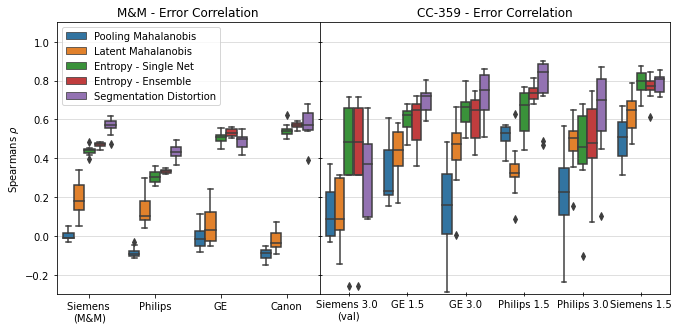

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(11, 5), sharey=True, gridspec_kw={'width_ratios': [12, 16]})
sns.boxplot(ax = axes[0], x="Domain", y=r'Spearmans $\rho$',
            hue="method", data=df_corr_mms)
#axes[0].get_legend().remove()
axes[0].legend().set_title('')
axes[0].set_title('M&M - Error Correlation')
axes[0].set_xlabel("")
axes[0].set_axisbelow(True)
axes[0].yaxis.grid(True, alpha=0.5, zorder=0)

sns.boxplot(ax = axes[1], x="Domain", y=r'Spearmans $\rho$',
            hue="method", data=df_corr_calgary)
axes[1].get_legend().remove()
axes[1].set_title('CC-359 - Error Correlation')

#axs_right[1].set_yticks([])
axes[1].set_ylabel("")
axes[1].set_xlabel("")
axes[1].tick_params(direction='inout')
axes[1].set_ylim(-0.3, 1.1)
axes[1].set_axisbelow(True)
axes[1].yaxis.grid(True, alpha=0.5, zorder=0)
fig.subplots_adjust(wspace=0, hspace=0)
fig.savefig("../../results-tmp/results/eval/err_corr.png", bbox_inches='tight', dpi=400, transparent=True)

In [10]:
# fig, axes = plt.subplots(1, 2, figsize=(11, 5), sharey=True, gridspec_kw={'width_ratios': [12, 16]})
# sns.boxplot(ax = axes[0], x="Domain", y=r'Spearmans $\rho$',
#             hue="method", data=df_corr_mms)
# #axes[0].get_legend().remove()
# axes[0].legend().set_title('')
# axes[0].set_title('M&M - Error Correlation')
# axes[0].set_xlabel("")
# axes[0].yaxis.grid(True, alpha=0.5, zorder=0)

# sns.boxplot(ax = axes[1], x="Domain", y=r'Spearmans $\rho$',
#             hue="method", data=df_corr_calgary)
# axes[1].get_legend().remove()
# axes[1].set_title('CC-359 - Error Correlation')

# #axs_right[1].set_yticks([])
# axes[1].set_ylabel("")
# axes[1].set_xlabel("")
# axes[1].tick_params(direction='inout')
# axes[1].set_ylim(-0.3, 1.1)
# axes[1].yaxis.grid(True, alpha=0.5, zorder=0)
# fig.subplots_adjust(wspace=0, hspace=0)
# fig.savefig("../../results-tmp/results/eval/err_corr_ensemble_test.jpg", bbox_inches='tight', dpi=400)

In [11]:
### quick post-hoc data formatting for fit the old data loading

# net_out = 'calgary'
# directory = f'../../results-tmp/results/eval/{net_out}/image/'
# for file in os.listdir(directory):
#     if 'ensemble' in file and 'corr' in file:
#         tmp = torch.load(directory+file)
#         out = {'corr': tmp}
#         torch.save(out, directory+file)